In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/DA/data/Datasets/train.csv')
df_train.head()

,title,text,subject,date,label,year
0,arizona gop poised ban social justice classes ...,another day another assault first amendment fr...,News,"January 14, 2017",0,2017
1,trump tells supporters he’ll enact law actuall...,one would think donald trump would learned les...,News,"June 22, 2017",0,2017
2,us senate vote montenegros nato membership,washington reuters us senate vote next week ra...,politicsNews,"March 23, 2017",1,2017
3,paul craig roberts ‘by cooperating washington ...,paul crag robertsa month ago wrote column hesi...,US_News,"October 26, 2016",0,2016
4,president trump tweets perfect new years messa...,comes close like acknowledge gratitude preside...,politics,"Dec 31, 2017",0,2017


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/DA/data/Datasets/test.csv')
df_test.head()

,title,text,subject,date,label
0,WATCH: Bernie Sanders Makes MAJOR Announcemen...,The mood at Democratic presidential hopeful Be...,News,"March 27, 2016",0
1,Trump renews threat to scrap NAFTA going into ...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"August 27, 2017",1
2,Minor train disruption rattles Singapore's rep...,SINGAPORE (Reuters) - Singapore is grappling w...,worldnews,"November 9, 2017",1
3,"Factbox: Who are Britain First, whose leader's...",LONDON (Reuters) - U.S. President Donald Trump...,worldnews,"November 29, 2017",1
4,The Los Angeles Times Endorses Hillary Clinto...,As Politico reports an almost neck-and-neck ra...,News,"May 30, 2016",0


In [ ]:
df_train.isna().sum()

title       0
text       52
subject     0
date        0
label       0
year        0
dtype: int64

In [ ]:
df_train = df_train.dropna()
df_train.isna().sum()

title      0
text       0
subject    0
date       0
label      0
year       0
dtype: int64

In [ ]:
x_train = df_train['text']
y_train = df_train['label']
x_test = df_test['text']
y_test = df_test['label']

In [ ]:
xgb = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', XGBClassifier(random_state = 42, seed = 2, colsample_bytree = 0.5, subsample = 0.5)),])
xgb.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 XGBClassifier(colsample_bytree=0.5, random_state=42, seed=2,
                               subsample=0.5))])

In [ ]:
y_pred = xgb.predict(x_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')

Accuracy: 98.3%


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      7067
           1       0.97      1.00      0.98      6403

    accuracy                           0.98     13470
   macro avg       0.98      0.98      0.98     13470
weighted avg       0.98      0.98      0.98     13470



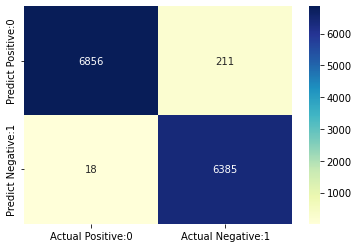

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:0', 'Actual Negative:1'], index = ['Predict Positive:0', 'Predict Negative:1'])
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')